<a href="https://colab.research.google.com/github/huyqcl377/Pham-Quang-Huy/blob/main/MFCC_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/MFCC numpy 20k bee dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

# Folder paths for training, validation, and test data
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

# Load validation data
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

# Load test data
test_mfcc_features, test_labels = load_data(TEST_DIR)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Convert the target labels to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Reshape the input data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Determine the shape of the MFCC features
input_shape = X_train.shape[1:]

# Define the model architecture
def create_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(16, 3, activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(2, activation='sigmoid')
    ])
    return model

# Create the model
model = create_model(input_shape=input_shape)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Define the callback for stopping training
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with the callback
history2 = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), callbacks=[early_stopping_callback])
model.save('/content/drive/MyDrive/Models/CNNsigmoid1D.h5')


Epoch 1/200
438/438 [==============================] - 10s 16ms/step - loss: 0.7266 - accuracy: 0.6174 - val_loss: 0.6348 - val_accuracy: 0.5985
Epoch 2/200
438/438 [==============================] - 5s 11ms/step - loss: 0.5422 - accuracy: 0.7308 - val_loss: 0.5893 - val_accuracy: 0.6560
Epoch 3/200
438/438 [==============================] - 5s 11ms/step - loss: 0.4910 - accuracy: 0.7613 - val_loss: 0.4653 - val_accuracy: 0.7750
Epoch 4/200
438/438 [==============================] - 7s 15ms/step - loss: 0.4385 - accuracy: 0.7961 - val_loss: 0.4130 - val_accuracy: 0.8085
Epoch 5/200
438/438 [==============================] - 4s 10ms/step - loss: 0.4336 - accuracy: 0.7944 - val_loss: 0.4053 - val_accuracy: 0.8065
Epoch 6/200
438/438 [==============================] - 3s 6ms/step - loss: 0.4115 - accuracy: 0.8097 - val_loss: 0.4321 - val_accuracy: 0.7835
Epoch 7/200
438/438 [==============================] - 3s 6ms/step - loss: 0.4034 - accuracy: 0.8096 - val_loss: 0.3784 - val_accuracy: 

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
# Get the model predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

decoded_test_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))
decoded_pred_labels = label_encoder.inverse_transform(y_pred)

confusion_mat = confusion_matrix(decoded_test_labels, decoded_pred_labels)
print("Confusion Matrix:")
print(confusion_mat)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(decoded_test_labels, decoded_pred_labels))

125/125 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9143
Test Loss: 0.20439383387565613
Test Accuracy: 0.9142500162124634
125/125 [==============================] - 0s 2ms/step
Confusion Matrix:
[[1743  257]
 [  86 1914]]
              precision    recall  f1-score   support

       Queen       0.95      0.87      0.91      2000
   Queenless       0.88      0.96      0.92      2000

    accuracy                           0.91      4000
   macro avg       0.92      0.91      0.91      4000
weighted avg       0.92      0.91      0.91      4000



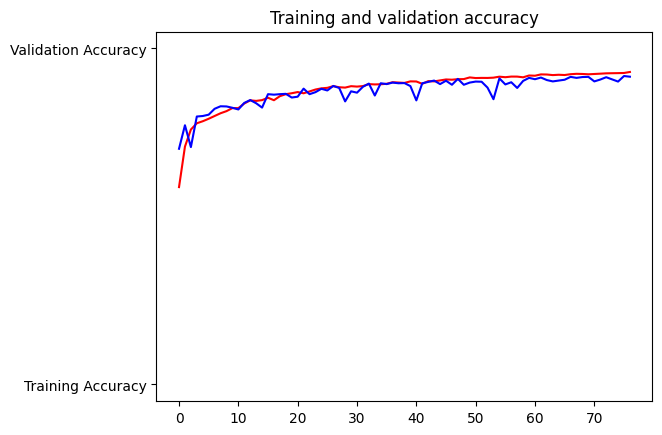

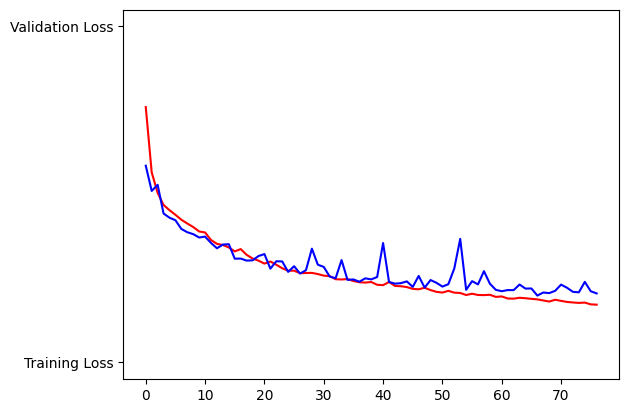

In [33]:

acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [16]:
#SVM + MFCCs
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Folder paths for training, validation, and test data
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

# Load validation data
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

# Load test data
test_mfcc_features, test_labels = load_data(TEST_DIR)

# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
y_test = np.array(encoded_test_labels)

# Train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Predict labels for validation data
y_val_pred = svm.predict(X_val)

# Convert the predicted validation labels back to original labels
predicted_val_labels = label_encoder.inverse_transform(y_val_pred)

# Evaluate the model on validation data
accuracy = accuracy_score(val_labels, predicted_val_labels)
report = classification_report(val_labels, predicted_val_labels)
confusion_mat = confusion_matrix(val_labels, predicted_val_labels)

# Print the evaluation metrics and confusion matrix
print("SVM Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_mat)

SVM Classifier:
Accuracy: 0.677
Classification Report:
              precision    recall  f1-score   support

       Queen       0.65      0.76      0.70      1000
   Queenless       0.71      0.59      0.65      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.67      2000
weighted avg       0.68      0.68      0.67      2000

Confusion Matrix:
[[762 238]
 [408 592]]


In [13]:
#RANDOM FOREST + MFCCs
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Folder paths for training, validation, and test data
TRAINING_DIR = "/tmp/MFCC numpy 20k bee dataset/train"
VALIDATION_DIR = "/tmp/MFCC numpy 20k bee dataset/val"
TEST_DIR = "/tmp/MFCC numpy 20k bee dataset/test"

# Load MFCC features from numpy arrays
def load_data(directory):
    mfcc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            mfcc = np.load(file_path)
            mfcc_features.append(mfcc)
            labels.append(label)
    return mfcc_features, labels

# Load training data
train_mfcc_features, train_labels = load_data(TRAINING_DIR)

# Load validation data
val_mfcc_features, val_labels = load_data(VALIDATION_DIR)

# Load test data
test_mfcc_features, test_labels = load_data(TEST_DIR)


# Convert labels to numeric values
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

# Convert the data to NumPy arrays
X_train = np.array(train_mfcc_features)
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_mfcc_features)
X_val = X_val.reshape(X_val.shape[0], -1)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_mfcc_features)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = np.array(encoded_test_labels)

# Train the Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict labels for validation data
y_val_pred = rf.predict(X_val)

# Convert the predicted validation labels back to original labels
predicted_val_labels = label_encoder.inverse_transform(y_val_pred)

# Evaluate the model on validation data
accuracy = accuracy_score(val_labels, predicted_val_labels)
report = classification_report(val_labels, predicted_val_labels)
confusion_mat = confusion_matrix(val_labels, predicted_val_labels)

# Print the evaluation metrics and confusion matrix
print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion_mat)

Random Forest Classifier:
Accuracy: 0.9195
Classification Report:
              precision    recall  f1-score   support

       Queen       0.91      0.93      0.92      1000
   Queenless       0.93      0.91      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Confusion Matrix:
[[929  71]
 [ 90 910]]


In [14]:
import joblib

svm_model_filename = "svm_model.pkl"
joblib.dump(svm, svm_model_filename)

rf_model_filename = "rf_model.pkl"
joblib.dump(rf, rf_model_filename)

['rf_model.pkl']